<h2>Import libraries</h2>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

sns.set_style("whitegrid")

<h2>Load dataset</h2>

In [2]:
df = pd.read_csv("PLACES__Local_Data_for_Better_Health__Census_Tract_Data_2023_release.csv")
df

,Year,StateAbbr,StateDesc,CountyName,CountyFIPS,LocationName,DataSource,Category,Measure,Data_Value_Unit,...,Data_Value_Footnote,Low_Confidence_Limit,High_Confidence_Limit,TotalPopulation,Geolocation,LocationID,CategoryID,MeasureId,DataValueTypeID,Short_Question_Text
0,2021,AL,Alabama,Autauga,1001,1001020100,BRFSS,Health Outcomes,Stroke among adults aged >=18 years,%,...,NaN,2.6,3.5,1912,POINT (-86.49001486 32.47718251),1001020100,HLTHOUT,STROKE,CrdPrv,Stroke
1,2021,AL,Alabama,Autauga,1001,1001020802,BRFSS,Disability,Any disability among adults aged >=18 years,%,...,NaN,25.6,33.7,10435,POINT (-86.5125898 32.53473876),1001020802,DISABLT,DISABILITY,CrdPrv,Any Disability
2,2021,AL,Alabama,Autauga,1001,1001020900,BRFSS,Health Outcomes,Arthritis among adults aged >=18 years,%,...,NaN,24.3,32.6,5675,POINT (-86.52377312 32.64296),1001020900,HLTHOUT,ARTHRITIS,CrdPrv,Arthritis
3,2021,AL,Alabama,Autauga,1001,1001021100,BRFSS,Disability,Mobility disability among adults aged >=18 years,%,...,NaN,21.3,26.5,3320,POINT (-86.7322331 32.45595369),1001021100,DISABLT,MOBILITY,CrdPrv,Mobility Disability
4,2021,AL,Alabama,Baldwin,1003,1003010200,BRFSS,Health Outcomes,Stroke among adults aged >=18 years,%,...,NaN,3.5,4.3,2902,POINT (-87.68176904 30.94276119),1003010200,HLTHOUT,STROKE,CrdPrv,Stroke
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2555108,2021,WI,Wisconsin,Waukesha,55133,55133203101,BRFSS,Health Outcomes,Depression among adults aged >=18 years,%,...,NaN,17.0,23.5,6536,POINT (-88.27895206 43.04127835),55133203101,HLTHOUT,DEPRESSION,CrdPrv,Depression
2555109,2021,WY,Wyoming,Laramie,56021,56021001901,BRFSS,Health Outcomes,Depression among adults aged >=18 years,%,...,NaN,17.2,23.1,4891,POINT (-104.6678895 41.43479963),56021001901,HLTHOUT,DEPRESSION,CrdPrv,Depression
2555110,2021,WY,Wyoming,Laramie,56021,56021001501,BRFSS,Health Outcomes,Chronic obstructive pulmonary disease among ad...,%,...,NaN,5.3,7.0,4765,POINT (-104.748713 41.18131941),56021001501,HLTHOUT,COPD,CrdPrv,COPD
2555111,2021,WI,Wisconsin,Waushara,55137,55137960400,BRFSS,Prevention,Taking medicine for high blood pressure contro...,%,...,NaN,76.9,83.7,3456,POINT (-89.48341388 44.06856363),55137960400,PREVENT,BPMED,CrdPrv,Taking BP Medication


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2555113 entries, 0 to 2555112
Data columns (total 23 columns):
 #   Column                      Dtype  
---  ------                      -----  
 0   Year                        int64  
 1   StateAbbr                   object 
 2   StateDesc                   object 
 3   CountyName                  object 
 4   CountyFIPS                  int64  
 5   LocationName                int64  
 6   DataSource                  object 
 7   Category                    object 
 8   Measure                     object 
 9   Data_Value_Unit             object 
 10  Data_Value_Type             object 
 11  Data_Value                  float64
 12  Data_Value_Footnote_Symbol  float64
 13  Data_Value_Footnote         float64
 14  Low_Confidence_Limit        float64
 15  High_Confidence_Limit       float64
 16  TotalPopulation             int64  
 17  Geolocation                 object 
 18  LocationID                  int64  
 19  CategoryID           

<h2>Clean dataset </h2>

In [4]:
# Checking the missing values
df.isnull().sum()

,0
Year,0
StateAbbr,0
StateDesc,0
CountyName,0
CountyFIPS,0
LocationName,0
DataSource,0
Category,0
Measure,0
Data_Value_Unit,0


In [5]:
columns_to_drop = [
    'Year', 'CountyFIPS', 'LocationName', 'DataSource', 'CategoryID',
    'Data_Value_Unit', 'Data_Value_Type', 'DataValueTypeID',
    'Data_Value_Footnote', 'Data_Value_Footnote_Symbol'
]

df_clean = df.drop(columns=columns_to_drop, errors='ignore')

# Drop rows with missing key values
df_clean = df_clean.dropna(subset=['Data_Value','Low_Confidence_Limit','High_Confidence_Limit'])

# Fix LocationID format
df_clean['LocationID'] = df_clean['LocationID'].astype(str).str.split('.').str[0]

In [6]:
print(df_clean.shape)
print(df_clean.columns)

(2555112, 13)
Index(['StateAbbr', 'StateDesc', 'CountyName', 'Category', 'Measure',
       'Data_Value', 'Low_Confidence_Limit', 'High_Confidence_Limit',
       'TotalPopulation', 'Geolocation', 'LocationID', 'MeasureId',
       'Short_Question_Text'],
      dtype='object')


In [7]:
# Count how many unique tracts, states, counties
print(f"States: {df_clean['StateAbbr'].nunique()}")
print(f"Counties: {df_clean['CountyName'].nunique()}")
print(f"LocationIDs: {df_clean['LocationID'].nunique()}")

States: 51
Counties: 1839
LocationIDs: 72337


In [8]:
# Save cleaned dataset to CSV
df_clean.to_csv("Cleaned_PLACES__Local_Data_for_Better_Health__Census_Tract_Data_2023_release.csv", index=False)

In [9]:
# Load cleaned file
df = pd.read_csv("Cleaned_PLACES__Local_Data_for_Better_Health__Census_Tract_Data_2023_release.csv")

<h2>Filter diabetes data</h2>

In [10]:
df_diabetes = df[df['Short_Question_Text'] == 'Diabetes']
print(f"Diabetes records: {df_diabetes.shape}")

Diabetes records: (68172, 13)


In [11]:
#Descriptive statistics for Data_Value (Diabetes Prevalence):
df_diabetes['Data_Value'].describe()

,Data_Value
count,68172.000000
mean,10.947423
std,3.743231
min,0.700000
25%,8.400000
50%,10.300000
75%,12.800000
max,46.100000


<h2>Distribution of Diabetes Prevalence - Histogram</h2>

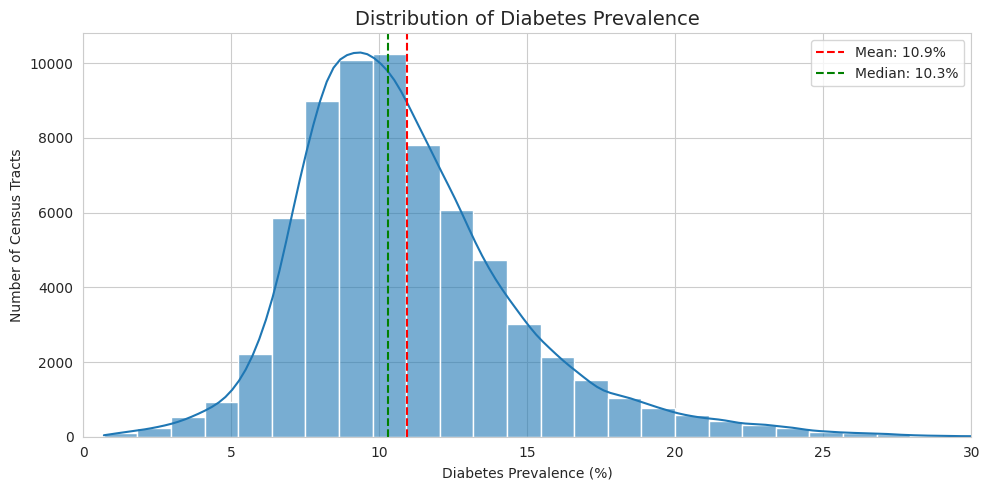

In [12]:
plt.figure(figsize=(10, 5))
sns.set_style("whitegrid")

sns.histplot(df_diabetes['Data_Value'], bins=40, kde=True, alpha=0.6)

# Add mean and median lines
mean_val = df_diabetes['Data_Value'].mean()
median_val = df_diabetes['Data_Value'].median()
plt.axvline(mean_val, color='red', linestyle='--', label=f'Mean: {mean_val:.1f}%')
plt.axvline(median_val, color='green', linestyle='--', label=f'Median: {median_val:.1f}%')

plt.title("Distribution of Diabetes Prevalence", fontsize=14)
plt.xlabel("Diabetes Prevalence (%)")
plt.ylabel("Number of Census Tracts")
plt.xlim(0, 30)  # Focus on main distribution (remove extreme outliers visually)
plt.legend()
plt.tight_layout()
plt.show()

<h2>Top States by Diabetes Prevalence - Barchart</h2>


Top 10 States with Highest Diabetes Prevalence:
   StateAbbr       mean       std  count
24        MS  14.395137  4.475961    658
48        WV  14.202893  2.778383    484
1         AL  14.118213  4.759340   1175
17        LA  13.596708  4.703646   1124
41        TN  12.937027  4.048971   1480
34        OH  12.819286  4.311373   2940
39        SC  12.803398  4.084176   1089
35        OK  12.593684  3.489845   1045
2         AR  12.569737  3.493253    684
31        NM  12.251205  3.307994    498


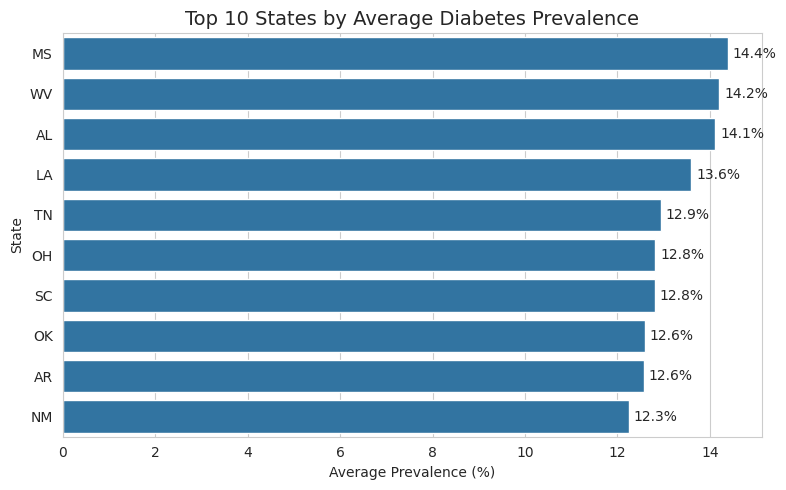

In [13]:
state_diabetes = df_diabetes.groupby('StateAbbr')['Data_Value'].agg(['mean', 'std', 'count']).reset_index()
state_diabetes = state_diabetes.sort_values('mean', ascending=False)
print("\nTop 10 States with Highest Diabetes Prevalence:")
top_states = state_diabetes.head(10)
print(top_states)

plt.figure(figsize=(8,5))
ax = sns.barplot(x=top_states['mean'], y=top_states['StateAbbr'])
plt.title("Top 10 States by Average Diabetes Prevalence", fontsize=14)
plt.xlabel("Average Prevalence (%)")
plt.ylabel("State")
for i, v in enumerate(top_states['mean']):
    ax.text(v + 0.1, i, f"{v:.1f}%", va='center')
plt.tight_layout()
plt.show()

<h2>Top Counties by Diabetes Prevalence - Barchart</h2>


Top 10 Counties with Highest Diabetes Prevalence:
       State_County       mean
60      AL - Greene  24.133333
2479    TX - Brooks  23.150000
349       GA - Clay  23.100000
2644  TX - Presidio  22.550000
94      AL - Wilcox  22.050000
1474    MS - Holmes  22.000000
81       AL - Perry  21.833333
2519    TX - Dimmit  21.800000
2586    TX - Kenedy  21.800000
1099    LA - Tensas  21.433333


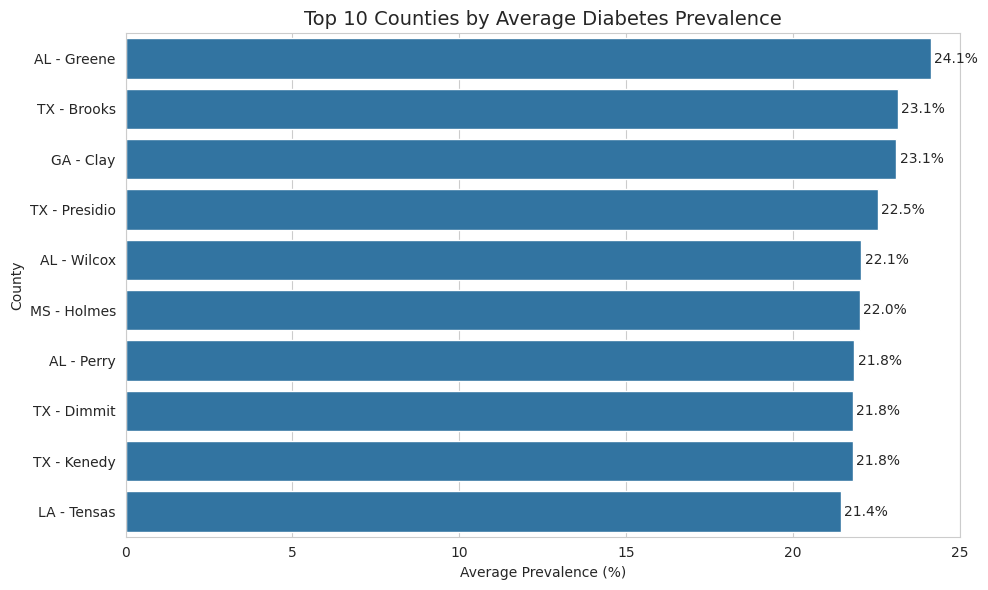

In [14]:
county_diabetes = df_diabetes.groupby(['StateAbbr','CountyName'])['Data_Value'].agg(['mean', 'std', 'count']).reset_index()
county_diabetes['State_County'] = county_diabetes['StateAbbr'] + " - " + county_diabetes['CountyName']
county_diabetes = county_diabetes.sort_values('mean', ascending=False)

print("\nTop 10 Counties with Highest Diabetes Prevalence:")
top_counties = county_diabetes.head(10)
print(top_counties[['State_County','mean']])

plt.figure(figsize=(10,6))
ax = sns.barplot(x=top_counties['mean'], y=top_counties['State_County'])
plt.title("Top 10 Counties by Average Diabetes Prevalence", fontsize=14)
plt.xlabel("Average Prevalence (%)")
plt.ylabel("County")
plt.xlim(0, 25)

for i, v in enumerate(top_counties['mean']):
    ax.text(v + 0.1, i, f"{v:.1f}%", va='center')
plt.tight_layout()
plt.show()

<h2>Risk Factor Analysis - Correlation Heatmap</h2>

In [15]:
# Identify all risk factors under 'Health Risk Behaviors'
all_risk_factors = df[df['Category'] == 'Health Risk Behaviors']['Short_Question_Text'].unique()
print("Detected Risk Factors:", sorted(all_risk_factors))

Detected Risk Factors: ['Binge Drinking', 'Current Smoking', 'Physical Inactivity', 'Sleep <7 hours']


In [16]:
# Filter dataset for risk factors + Diabetes
df_risk = df[df['Short_Question_Text'].isin(list(all_risk_factors) + ['Diabetes'])]
print(f"Filtered dataset shape: {df_risk.shape}")

Filtered dataset shape: (345025, 13)


In [17]:
# Pivot to get one row per LocationID and one column per measure
df_pivot = df_risk.pivot_table(
    index='LocationID',
    columns='Short_Question_Text',
    values='Data_Value'
).dropna()

print(f"Pivoted dataset shape: {df_pivot.shape}")
print("Pivoted columns (measures):", df_pivot.columns.tolist())

Pivoted dataset shape: (68172, 5)
Pivoted columns (measures): ['Binge Drinking', 'Current Smoking', 'Diabetes', 'Physical Inactivity', 'Sleep <7 hours']


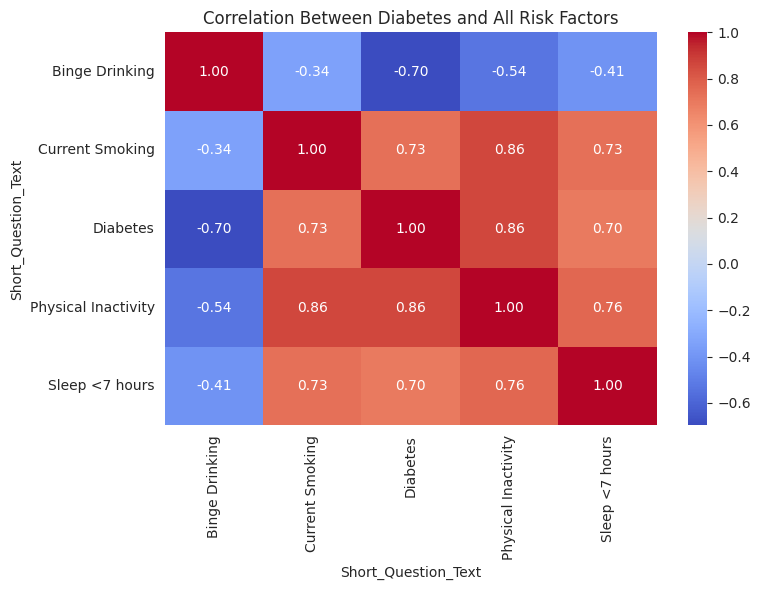

In [18]:
# Correlation heatmap for all risk factors + Diabetes
plt.figure(figsize=(8, 6))
sns.heatmap(df_pivot.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Between Diabetes and All Risk Factors")
plt.tight_layout()
plt.show()

<h2>Diabetes vs Risk Factors - Scatter plots</h2>

In [19]:
# Get correlations for all risk factors (except Diabetes itself)
diabetes_corr = df_pivot.corr()['Diabetes'].drop('Diabetes').sort_values(ascending=False)
all_factors = diabetes_corr.index.tolist()

print("Correlations of all risk factors with Diabetes:")
print(diabetes_corr)

Correlations of all risk factors with Diabetes:
Short_Question_Text
Physical Inactivity    0.862895
Current Smoking        0.732904
Sleep <7 hours         0.696071
Binge Drinking        -0.697082
Name: Diabetes, dtype: float64


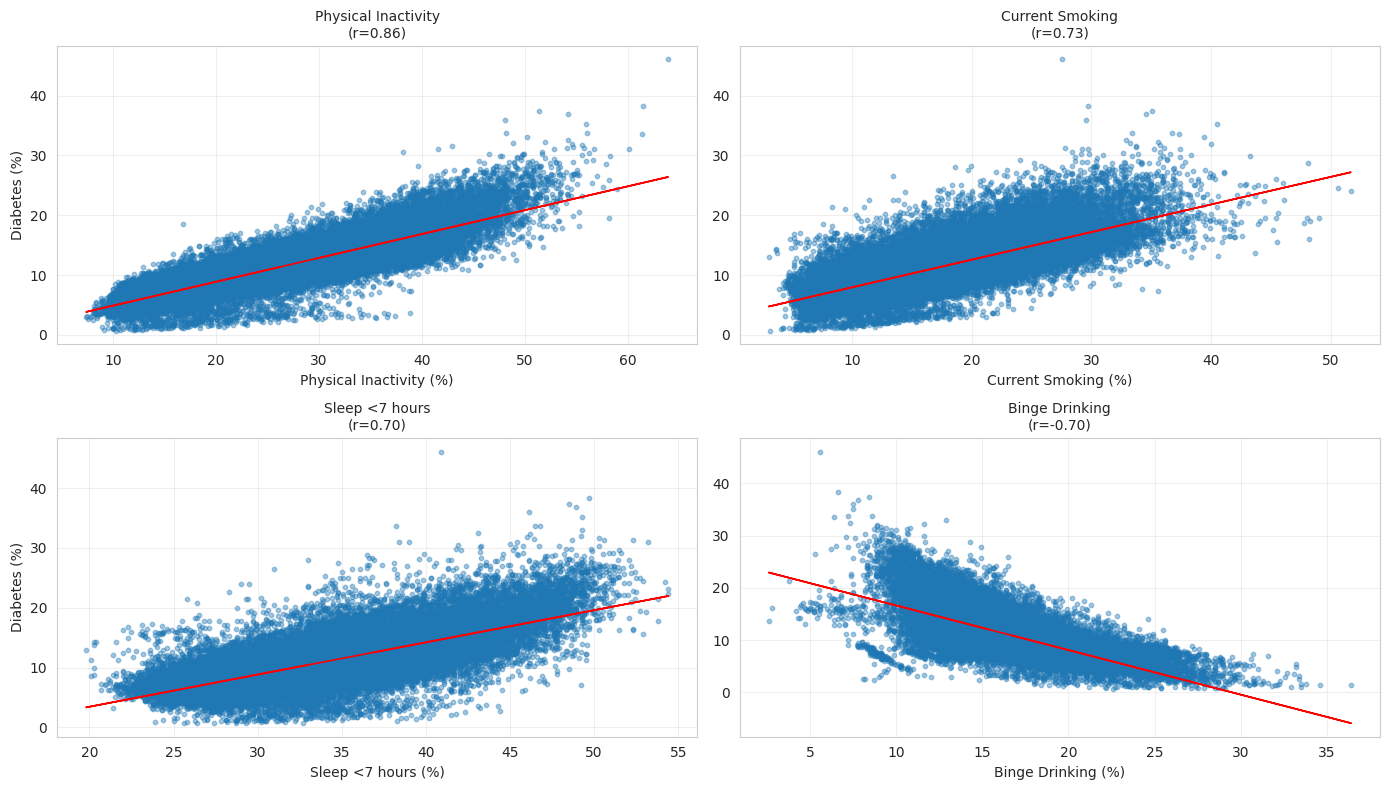

In [20]:
 # Set grid layout
n_cols = 2
n_rows = -(-len(all_factors) // n_cols) # ceiling division
plt.figure(figsize=(14, 4 * n_rows))
for i, factor in enumerate(all_factors, 1):
    x, y = df_pivot[factor], df_pivot['Diabetes']
    plt.subplot(n_rows, n_cols, i)
    plt.scatter(x, y, alpha=0.4, s=10) # Scatter plot

    # Add linear regression trendline
    m, b = np.polyfit(x, y, 1)
    plt.plot(x, m*x + b, 'r', lw=1.2)
    plt.xlabel(f"{factor} (%)")
    if i % n_cols == 1:
        plt.ylabel("Diabetes (%)")
    plt.title(f"{factor}\n(r={diabetes_corr[factor]:.2f})", fontsize=10)
    plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()


# RQ #2: PREDICTIVE MODELING


In [21]:
X = df_pivot[['Physical Inactivity', 'Current Smoking', 'Sleep <7 hours', 'Binge Drinking']]
y = df_pivot['Diabetes']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

all_models = []

In [22]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import numpy as np

# List of models to evaluate
models = {
    "Linear Regression": LinearRegression(),
    "Decision Tree": DecisionTreeRegressor(max_depth=10, random_state=42),
    "Random Forest": RandomForestRegressor(n_estimators=100, max_depth=15, random_state=42),
    "Gradient Boosting": GradientBoostingRegressor(n_estimators=100, max_depth=5, random_state=42)
}

all_models = []
n = len(X_test)
p = X_test.shape[1]  # number of features

# Train, predict, and evaluate in one loop
for name, model in models.items():
    model.fit(X_train, y_train)
    preds = model.predict(X_test)

    # Compute metrics
    r2 = r2_score(y_test, preds)
    adj_r2 = 1 - (1 - r2) * (n - 1) / (n - p - 1)
    rmse = np.sqrt(mean_squared_error(y_test, preds))
    mae = mean_absolute_error(y_test, preds)

    # Append all results
    all_models.append({
        "Model": name,
        "R²": r2,
        "Adjusted R²": adj_r2,
        "RMSE": rmse,
        "MAE": mae,
        "model_object": model,
        "predictions": preds
    })

# Compare models

In [23]:
comparison_df = pd.DataFrame([{
    'Model': m['Model'],
    'R²': m['R²'],
    'Adjusted R²': m['Adjusted R²'],
    'RMSE': m['RMSE'],
    'MAE': m['MAE']
} for m in all_models])
comparison_df = comparison_df.sort_values('R²', ascending=False)

print("\n--- MODEL COMPARISON ---")
print(comparison_df.to_string(index=False))


--- MODEL COMPARISON ---
            Model       R²  Adjusted R²     RMSE      MAE
    Random Forest 0.872808     0.872770 1.326043 0.961790
Gradient Boosting 0.868849     0.868811 1.346520 0.991504
    Decision Tree 0.852825     0.852781 1.426411 1.027313
Linear Regression 0.831362     0.831312 1.526881 1.123100


# Find best model

In [24]:
best_model = all_models[comparison_df.index[0]]
best_model_name = best_model['Model']
best_model_object = best_model['model_object']

print(f"\nBest Model: {best_model_name}")
print(f"R² = {best_model['R²']:.4f} | RMSE = {best_model['RMSE']:.4f} | MAE = {best_model['MAE']:.4f}")


Best Model: Random Forest
R² = 0.8728 | RMSE = 1.3260 | MAE = 0.9618


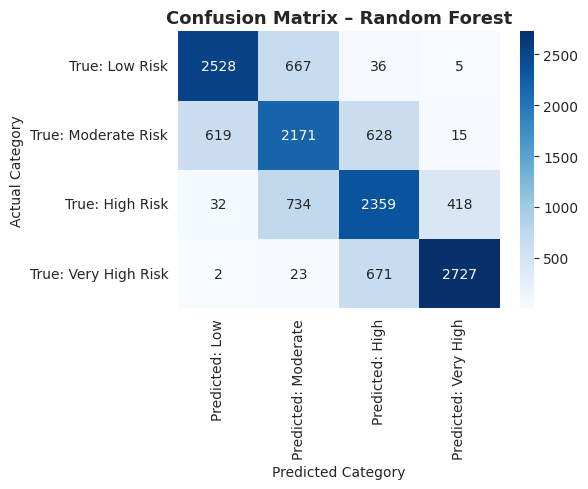


--- Random Forest Classification Metrics ---
Accuracy :  0.718
Precision:  0.723
Recall   :  0.718
F1-Score :  0.720

--- Classification Report ---
              precision    recall  f1-score   support

        High      0.639     0.666     0.652      3543
         Low      0.795     0.781     0.788      3236
    Moderate      0.604     0.632     0.618      3433
   Very High      0.862     0.797     0.828      3423

    accuracy                          0.718     13635
   macro avg      0.725     0.719     0.721     13635
weighted avg      0.723     0.718     0.720     13635



In [25]:
# Evaluation: Confusion Matrix and Classification Metrics
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# Use the best model to predict on test data
y_pred = best_model_object.predict(X_test)

# Convert continuous diabetes predictions to risk categories
q1, q2, q3 = y_train.quantile([0.25, 0.50, 0.75])

def categorize(value):
    if value < q1: return 'Low'
    elif value < q2: return 'Moderate'
    elif value < q3: return 'High'
    else: return 'Very High'

# Apply categorization
y_test_cat = y_test.apply(categorize)
y_pred_cat = pd.Series(y_pred).apply(categorize)

# Confusion Matrix
cm = confusion_matrix(y_test_cat, y_pred_cat, labels=['Low', 'Moderate', 'High', 'Very High'])
cm_df = pd.DataFrame(cm,
                     index=['True: Low Risk', 'True: Moderate Risk', 'True: High Risk', 'True: Very High Risk'],
                     columns=['Predicted: Low', 'Predicted: Moderate', 'Predicted: High', 'Predicted: Very High'])
plt.figure(figsize=(6, 5))
sns.heatmap(cm_df, annot=True, cmap='Blues', fmt='d')
plt.title(f'Confusion Matrix – {best_model_name}', fontsize=13, fontweight='bold')
plt.ylabel('Actual Category')
plt.xlabel('Predicted Category')
plt.tight_layout()
plt.show()

#  Classification Metrics

# Overall metrics
accuracy = accuracy_score(y_test_cat, y_pred_cat)
precision = precision_score(y_test_cat, y_pred_cat, average='weighted', zero_division=0)
recall = recall_score(y_test_cat, y_pred_cat, average='weighted', zero_division=0)
f1 = f1_score(y_test_cat, y_pred_cat, average='weighted', zero_division=0)

print(f"\n--- {best_model_name} Classification Metrics ---")
print(f"Accuracy :  {accuracy:.3f}")
print(f"Precision:  {precision:.3f}")
print(f"Recall   :  {recall:.3f}")
print(f"F1-Score :  {f1:.3f}")

# Detailed per-class metrics
print("\n--- Classification Report ---")
print(classification_report(y_test_cat, y_pred_cat, digits=3))


# Feature importance for best model


--- FEATURE IMPORTANCE (Random Forest) ---
            Feature  Importance
Physical Inactivity    0.766315
     Binge Drinking    0.154727
     Sleep <7 hours    0.042747
    Current Smoking    0.036211


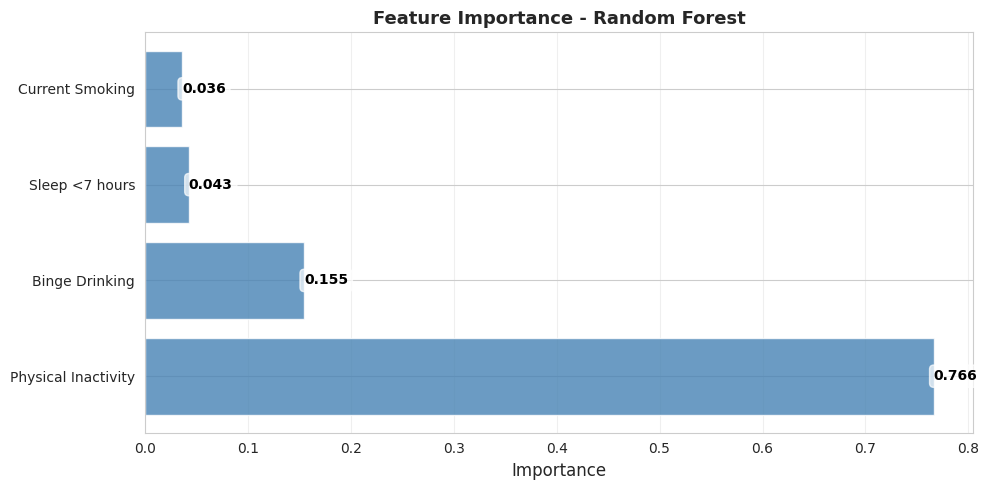

In [26]:
if hasattr(best_model_object, 'feature_importances_'):
    importance = pd.DataFrame({
        'Feature': X.columns,
        'Importance': best_model_object.feature_importances_
    }).sort_values('Importance', ascending=False)

    print(f"\n--- FEATURE IMPORTANCE ({best_model_name}) ---")
    print(importance.to_string(index=False))

    # Visualize with data labels
    plt.figure(figsize=(10, 5))
    bars = plt.barh(importance['Feature'], importance['Importance'], color='steelblue', alpha=0.8)

    # Add value labels on bars
    for i, (bar, value) in enumerate(zip(bars, importance['Importance'])):
        plt.text(value, bar.get_y() + bar.get_height()/2, f'{value:.3f}',
                ha='left', va='center', fontweight='bold', fontsize=10,
                color='black', bbox=dict(boxstyle='round,pad=0.3', facecolor='white', alpha=0.7))

    plt.xlabel('Importance', fontsize=12)
    plt.title(f'Feature Importance - {best_model_name}', fontsize=13, fontweight='bold')
    plt.grid(axis='x', alpha=0.3)
    plt.tight_layout()
    plt.show()

elif hasattr(best_model_object, 'coef_'):
    coef_df = pd.DataFrame({
        'Feature': X.columns,
        'Coefficient': best_model_object.coef_
    }).sort_values('Coefficient', key=abs, ascending=False)

    print(f"\n--- COEFFICIENTS ({best_model_name}) ---")
    print(coef_df.to_string(index=False))
    print(f"Intercept: {best_model_object.intercept_:.4f}")

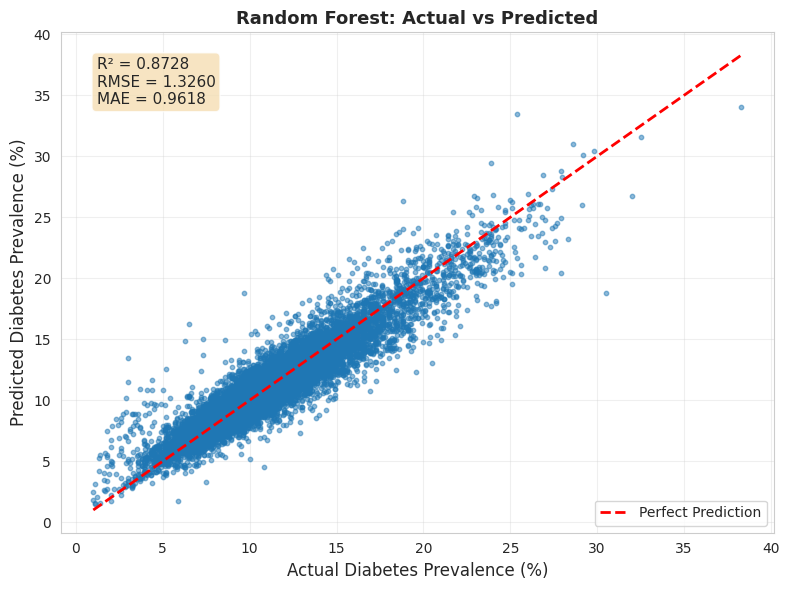

In [27]:
# Actual vs Predicted plot with metrics
plt.figure(figsize=(8, 6))
plt.scatter(y_test, best_model['predictions'], alpha=0.5, s=10)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()],
         'r--', linewidth=2, label='Perfect Prediction')

# Add metrics as text box
textstr = f'R² = {best_model["R²"]:.4f}\nRMSE = {best_model["RMSE"]:.4f}\nMAE = {best_model["MAE"]:.4f}'
props = dict(boxstyle='round', facecolor='wheat', alpha=0.8)
plt.text(0.05, 0.95, textstr, transform=plt.gca().transAxes, fontsize=11,
        verticalalignment='top', bbox=props)

plt.xlabel('Actual Diabetes Prevalence (%)', fontsize=12)
plt.ylabel('Predicted Diabetes Prevalence (%)', fontsize=12)
plt.title(f'{best_model_name}: Actual vs Predicted', fontsize=13, fontweight='bold')
plt.legend()
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

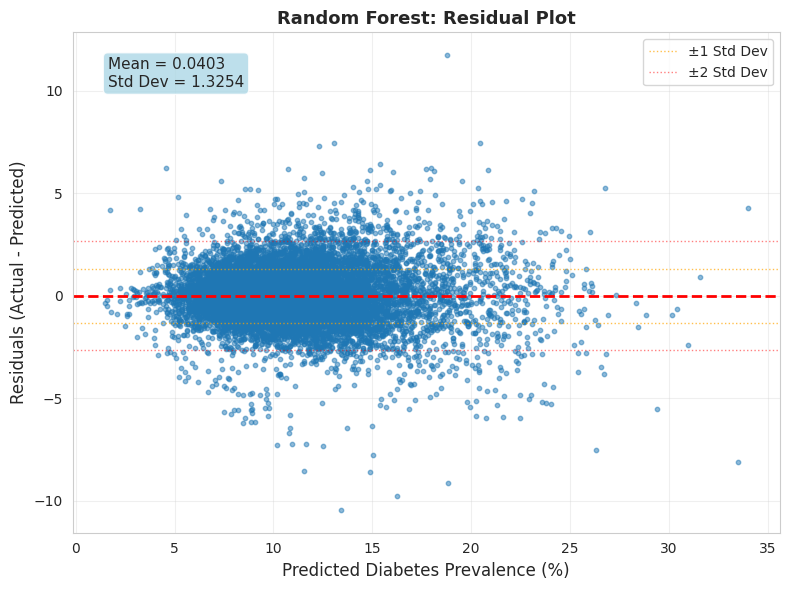

In [28]:
# Residuals plot with statistics
residuals = y_test - best_model['predictions']
plt.figure(figsize=(8, 6))
plt.scatter(best_model['predictions'], residuals, alpha=0.5, s=10)
plt.axhline(y=0, color='r', linestyle='--', linewidth=2)

# Add residual statistics
mean_residual = np.mean(residuals)
std_residual = np.std(residuals)
textstr = f'Mean = {mean_residual:.4f}\nStd Dev = {std_residual:.4f}'
props = dict(boxstyle='round', facecolor='lightblue', alpha=0.8)
plt.text(0.05, 0.95, textstr, transform=plt.gca().transAxes, fontsize=11,
        verticalalignment='top', bbox=props)

# Add horizontal lines for ±1 and ±2 standard deviations
plt.axhline(y=std_residual, color='orange', linestyle=':', linewidth=1, alpha=0.7, label='±1 Std Dev')
plt.axhline(y=-std_residual, color='orange', linestyle=':', linewidth=1, alpha=0.7)
plt.axhline(y=2*std_residual, color='red', linestyle=':', linewidth=1, alpha=0.5, label='±2 Std Dev')
plt.axhline(y=-2*std_residual, color='red', linestyle=':', linewidth=1, alpha=0.5)

plt.xlabel('Predicted Diabetes Prevalence (%)', fontsize=12)
plt.ylabel('Residuals (Actual - Predicted)', fontsize=12)
plt.title(f'{best_model_name}: Residual Plot', fontsize=13, fontweight='bold')
plt.legend(loc='upper right')
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

# RQ #4: CLUSTERING

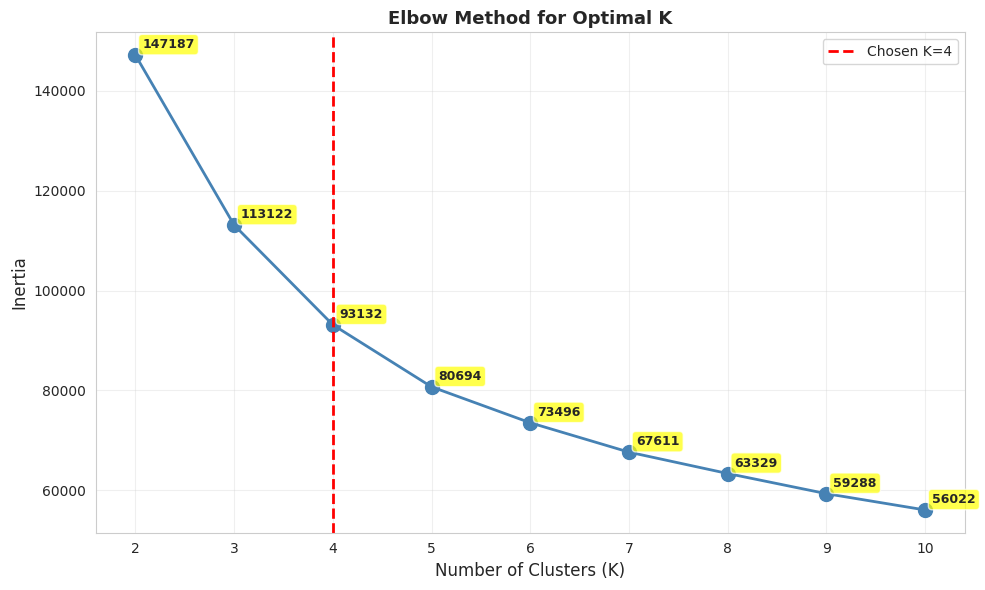

In [29]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_pivot[all_risk_factors])

# Elbow method
inertias = []
for k in range(2, 11):
    kmeans_test = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans_test.fit(X_scaled)
    inertias.append(kmeans_test.inertia_)

# Elbow plot with data labels
plt.figure(figsize=(10, 6))
plt.plot(range(2, 11), inertias, 'o-', linewidth=2, markersize=10, color='steelblue')

# Add inertia values as labels
for k, inertia in zip(range(2, 11), inertias):
    plt.annotate(f'{inertia:.0f}', xy=(k, inertia),
                xytext=(5, 5), textcoords='offset points',
                fontsize=9, fontweight='bold',
                bbox=dict(boxstyle='round,pad=0.3', facecolor='yellow', alpha=0.7))

plt.axvline(x=4, color='red', linestyle='--', linewidth=2, label='Chosen K=4')
plt.xlabel('Number of Clusters (K)', fontsize=12)
plt.ylabel('Inertia', fontsize=12)
plt.title('Elbow Method for Optimal K', fontsize=13, fontweight='bold')
plt.legend()
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

In [30]:
# K-Means with K=4
kmeans = KMeans(n_clusters=4, random_state=42, n_init=10)
df_pivot['Cluster'] = kmeans.fit_predict(X_scaled)
all_risk_factors = list(all_risk_factors) + ['Diabetes']
cluster_profiles = df_pivot.groupby('Cluster')[all_risk_factors].mean().round(1)
cluster_sizes = df_pivot.groupby('Cluster').size()
cluster_profiles = cluster_profiles.sort_values('Diabetes', ascending=False)

# Assign risk names
risk_levels = ['Very High Risk', 'High Risk', 'Moderate Risk', 'Low Risk']
cluster_names = {cluster_id: risk_levels[i] for i, cluster_id in enumerate(cluster_profiles.index)}

print("\n--- CLUSTER PROFILES ---")
for cluster_id, risk_level in cluster_names.items():
    profile = cluster_profiles.loc[cluster_id]
    size = cluster_sizes[cluster_id]
    pct = (size / len(df_pivot)) * 100

    print(f"\n{risk_level}: {size:,} tracts ({pct:.1f}%)")
    print(f"  Diabetes: {profile['Diabetes']:.1f}% | Inactivity: {profile['Physical Inactivity']:.1f}%")
    print(f"  Smoking: {profile['Current Smoking']:.1f}% | Sleep <7h: {profile['Sleep <7 hours']:.1f}%")
    print(f"  Binge Drinking: {profile['Binge Drinking']:.1f}%")


--- CLUSTER PROFILES ---

Very High Risk: 10,717 tracts (15.7%)
  Diabetes: 16.8% | Inactivity: 38.2%
  Smoking: 25.7% | Sleep <7h: 41.2%
  Binge Drinking: 13.6%

High Risk: 26,607 tracts (39.0%)
  Diabetes: 11.5% | Inactivity: 27.7%
  Smoking: 18.2% | Sleep <7h: 35.2%
  Binge Drinking: 16.3%

Moderate Risk: 17,863 tracts (26.2%)
  Diabetes: 9.2% | Inactivity: 18.8%
  Smoking: 11.1% | Sleep <7h: 30.2%
  Binge Drinking: 15.8%

Low Risk: 12,985 tracts (19.0%)
  Diabetes: 7.3% | Inactivity: 18.1%
  Smoking: 12.7% | Sleep <7h: 30.6%
  Binge Drinking: 21.0%


<Figure size 1000x700 with 0 Axes>

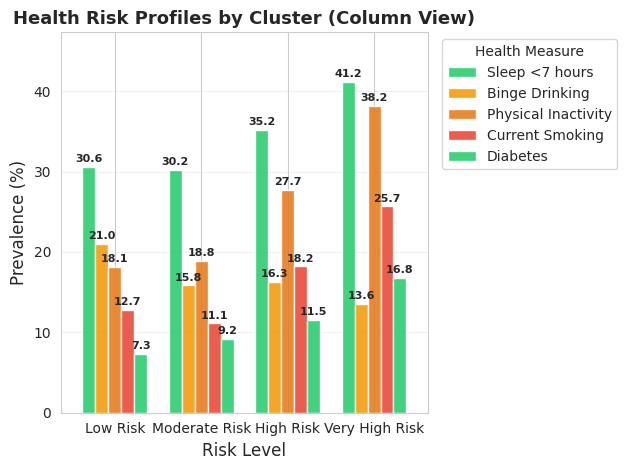

In [31]:
# Cluster visualization with data labels
plt.figure(figsize=(10, 7))

# Compute cluster averages for all factors
cluster_plot = df_pivot.groupby('Cluster')[all_risk_factors].mean()
cluster_plot.index = [cluster_names[i] for i in cluster_plot.index]
cluster_plot = cluster_plot.loc[['Low Risk', 'Moderate Risk', 'High Risk', 'Very High Risk']]

# Plot as vertical column chart
ax = cluster_plot.plot(
    kind='bar',
    width=0.75,
    color=['#2ecc71', '#f39c12', '#e67e22', '#e74c3c'],
    alpha=0.9
)

# Add value labels on top of bars
for container in ax.containers:
    ax.bar_label(container, fmt='%.1f', label_type='edge', fontsize=8,
                 padding=2, fontweight='bold')

plt.ylabel('Prevalence (%)', fontsize=12)
plt.xlabel('Risk Level', fontsize=12)
plt.title('Health Risk Profiles by Cluster (Column View)', fontsize=13, fontweight='bold')
plt.xticks(rotation=0, ha='center')
plt.legend(title='Health Measure', bbox_to_anchor=(1.02, 1), loc='upper left')
plt.grid(axis='y', alpha=0.3)

# Adjust layout
plt.ylim(0, cluster_plot.values.max() * 1.15)
plt.tight_layout()
plt.show()
